# Python<img src='https://developers.redhat.com/sites/default/files/styles/article_feature/public/blog/2014/09/python-logo.png?itok=NNQ6xBcf' align='after' width=180> for <img align='after' width='180' src='https://drive.google.com/uc?export=view&id=19qZe5VIxkIEm7_hYkrvlH142XPBxBaEf'>
 # Data manipulations for a possible resolution of the team assignment


---
> This notebook processes the data from the excel sheet from [canvas](https://canvas.uva.nl/courses/38641/files/8689329?module_item_id=1649554) in order to obtain the information that you may need to solve the team Assignment 1. Feel free to make a copy of this notebook and add the code of your resolution to it.
---

In [3]:
import sys
if 'google.colab' in sys.modules:
    import os
    from google.colab import files
    # just check if we already uploaded, may we restart the runtime and run all cells
    if not os.path.isfile('Data Set Feedcalculator.xlsx'):
        uploaded = files.upload()

Saving Data Set Feedcalculator.xlsx to Data Set Feedcalculator.xlsx


In [4]:
import sys
at_colab = "google.colab" in sys.modules

In [5]:
if at_colab:
    import shutil
    if not shutil.which("pyomo"):
        !pip install -q pyomo
        assert(shutil.which("pyomo"))

    if not shutil.which('/usr/bin/cbc'):
        !apt-get install -y -qq coinor-cbc
        assert(shutil.which('/usr/bin/cbc'))

import pyomo.environ as pyo, matplotlib.pyplot as plt, pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3

# Read the data, as you have already seen [here]( https://colab.research.google.com/drive/1Q3fNgpa8QfGTzJ7lj-oZ8Ya0IIGCdnEr).

In [6]:
import pandas as pd
data = pd.read_excel('Data Set Feedcalculator.xlsx',sheet_name=None)

In [7]:
ingredients      = data['Ingredient Database']
nutrient_rules   = data['Nutrient Rules']
ingredient_rules = data['Ingredient Rules']

# Collect the ingredients that are available together with the relevant columns

In [8]:
available_ingredients = ingredients[ingredients.Availability][['Name','Reference name','Price']+list(nutrient_rules.Nutrient)].set_index('Reference name')
available_ingredients

,Name,Price,oebr,cp,cfibre,staew,ca,na,opp,dlysp,dmetp,dmcp,dthrp,dtryp,dvalp,dargp
Reference name,,,,,,,,,,,,,,,,
barley,Barley,0.26,2656.5,99.7,43.4,539.3,0.4,0.1,1.2,2.3,1.3,2.9,2.3,0.9,3.6,3.9
blood,Blood meal 80% CP,0.71,2450.0,800.0,10.0,0.0,0.5,5.8,1.3,51.3,6.9,13.8,25.4,8.7,49.6,24.8
boneash,Bone ash,0.18,0.0,0.0,0.0,0.0,289.3,9.5,82.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cotton,Cotton seed cake,0.20,1730.0,362.9,169.8,33.6,2.2,0.0,3.1,8.8,3.9,8.1,8.0,3.2,11.8,32.7
fish,Fish meal 56% CP,0.63,2862.0,563.0,0.0,0.0,60.0,10.5,19.6,38.5,14.3,18.8,20.1,5.6,32.3,30.6
fishlq,Fish meal 40% CP,0.55,0.0,384.0,0.0,0.0,141.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gnseeds,Groundnut seeds,0.59,5243.0,287.1,23.3,0.0,1.0,0.0,1.7,7.5,2.8,5.9,5.8,2.4,9.5,28.1
maize,Maize/ Corn,0.33,3227.8,76.3,20.8,648.5,0.1,0.0,0.7,1.4,1.4,2.7,2.1,0.4,2.9,3.1
maizebranhighq,"Maize bran, high quality",0.19,2893.4,90.6,39.6,489.3,1.3,0.2,1.4,1.8,1.6,3.1,2.4,0.5,3.8,3.9


# Collect the nutrient bounds

Note that 'not available' in a data frame is not the same as None!

In [9]:
nutrient_bounds = { nut : (lb if not pd.isna(lb) else 0,     # no lower bound translates into 0 as lower bound
                           ub if not pd.isna(ub) else None)  # no upper bound becomes None
                    for nut,lb,ub in zip(nutrient_rules.Nutrient,nutrient_rules['Lower Bound'],nutrient_rules['Upper Bound'])
                  }

In [10]:
nutrient_bounds

{'oebr': (2750.0, 2850.0),
 'cp': (155.0, 195.0),
 'cfibre': (0, 75.0),
 'staew': (300.0, None),
 'ca': (7.0, 9.0),
 'na': (1.4, 2.1),
 'opp': (3.5, None),
 'dlysp': (6.7, 7.9),
 'dmetp': (2.8, None),
 'dmcp': (5.1, 6.1),
 'dthrp': (4.5, None),
 'dtryp': (1.3, None),
 'dvalp': (5.4, None),
 'dargp': (7.0, None)}

# Collect the ingredient bounds

Note again that 'not available' in a data frame is not the same as None!

In [11]:
ingredient_bounds = { ing : (lb if not pd.isna(lb) else 0,    # no lower bound translates into 0 as lower bound
                             ub if not pd.isna(ub) else None) # no upper bound becomes None
                      for ing,lb,ub in zip(ingredient_rules.Ingredient,ingredient_rules['Lower Bound'],ingredient_rules['Upper Bound']) }

In [12]:
ingredient_bounds

{'barley': (0, 0.1),
 'blood': (0, 0.03),
 'boneash': (0, 0.03),
 'mbmeal': (0, 0.05),
 'mbmeal2': (0, 0.08),
 'cotton': (0, 0.06),
 'copra': (0, 0.07),
 'fats': (0, 0.05),
 'fish': (0, 0.07),
 'fishlq': (0, 0.07),
 'maize': (0.2, None),
 'maizebranhighq': (0, 0.25),
 'maizebranlowq': (0, 0.15),
 'sugars': (0, 0.01),
 'rapecake': (0, 0.06),
 'rapemeal': (0, 0.06),
 'rice': (0, 0.15),
 'gnseeds': (0, 0.1),
 'gncake': (0, 0.08),
 'soybeanexp': (0, 0.07),
 'soybeanmeal': (0, 0.32),
 'soybeanmealhp': (0, 0.33),
 'soybeanheat': (0, 0.3),
 'sunflower': (0, 0.12),
 'sesamecake': (0, 0.12),
 'wheat': (0, 0.25),
 'wheatbran': (0, 0.08),
 'tapbran': (0, 0.2),
 'caswhole': (0, 0.25),
 'casfine': (0, 0.25),
 'cascoarse': (0, 0.15),
 'sunflowerseeds': (0, 0.12),
 'lime': (0, 0.02),
 'salt': (0, 0.003)}

# Collect the combined ingredient rules

This is slightly more complex, as we need to know where this data is placed in the sheet, hence the data frame.
Note how we use `.dropna()` on series to leave only the values defined.
Note as well how we filter the ingredients that are not available.
It may happen that a combined rule disappears, because it did only relate to not available ingredients.

If you want to know where the `Unnamed: ` columns are comming from, just examine the `ingredient_rules` data frame.


In [13]:
combined_ingredient_rules   = []
set_of_availabe_ingredients = set(available_ingredients.index)
for c in ['Unnamed: '+str(i) for i in range(5,13)]:
    aux = ingredient_rules[[c]].dropna().values
    aux = [ v[0] for v in aux ]
    upperbound          = aux[0]
    ingredients_in_rule = set(aux[1:]).intersection(set_of_availabe_ingredients)
    if ingredients_in_rule:
        combined_ingredient_rules.append((upperbound,ingredients_in_rule))
combined_ingredient_rules

[(0.17, {'cotton', 'sunflower'}),
 (0.35, {'soybeanexp', 'soybeanmeal'}),
 (0.3, {'barley'}),
 (0.25, {'maizebranhighq', 'maizebranlowq'}),
 (0.07, {'fish', 'fishlq'}),
 (0.08, {'mbmeal'}),
 (0.25, {'casfine', 'caswhole', 'tapbran'})]

### 1.1

In [14]:
!apt-get install -y coinor-cbc
import pyomo.environ as pyo
import pandas as pd
from openpyxl import Workbook, load_workbook
import pyomo.opt as po
from io import StringIO

def table_11():
  #Initialise basic model
  model=pyo.ConcreteModel('model')

  #Define sets
  model.I = pyo.Set( initialize =  available_ingredients.index)
  model.N = pyo.Set( initialize = list(nutrient_rules.Nutrient))
  model.R = pyo.Set( initialize = range(len(combined_ingredient_rules))) #Number of combination rules

  #Define variable (amount of ingredient i)
  model.x = pyo.Var(model.I, within=pyo.NonNegativeReals, bounds = (0,1))

  #Model objective (minimise total cost)
  costs_expr = sum(model.x[i]*available_ingredients['Price'][i] for i in model.I)
  model.costs = pyo.Objective(sense=pyo.minimize, expr=costs_expr)

  #Base model constraints
  #Constraint (bounds on ingredient-2) - including cases where there is no bound (None), ingredient bound not in list
  def ingredient_lb(model, i):
    return(ingredient_bounds.get(i[0], 0) <= model.x[i])
  model.ingredient_lower_bound = pyo.Constraint(model.I, rule=ingredient_lb)

  def ingredient_ub(model, i):
    if (i not in ingredient_bounds) or ingredient_bounds[i][1] == None:
      return(pyo.Constraint.Feasible)
    else:
      return(model.x[i] <= ingredient_bounds[i][1])
  model.ingredient_upper_bound= pyo.Constraint(model.I, rule=ingredient_ub)

  #Constraint (bounds on nutrient-2) - including cases where there is no bound (None)
  def nutrient_lb(model, j):
    vx = sum(model.x[i]*available_ingredients[j][i]  for i in model.I )
    return(nutrient_bounds[j][0] <= vx)
  model.nutrient_lower_bound = pyo.Constraint(model.N, rule=nutrient_lb)

  def nutrient_ub(model, j):
    vx = sum(model.x[i]*available_ingredients[j][i]  for i in model.I )
    if nutrient_bounds[j][1] != None:
      return(vx <= nutrient_bounds[j][1])
    else:
      return(pyo.Constraint.Feasible)
  model.nutrient_upper_bound= pyo.Constraint(model.N, rule=nutrient_ub)

  #Constraint (total ingredient sum to be 100%) (sum limit)
  def percent_rule(model):
    return(sum(model.x[i] for i in model.I) == 1)
  model.percent = pyo.Constraint(rule=percent_rule)

  #Constraint added in 1.1
  #Constraint (combined ingredient rules)
  def combination_rule(model, r):
    return(sum(model.x[i] for i in combined_ingredient_rules[r][1]) <= combined_ingredient_rules[r][0])
  model.combination = pyo.Constraint(model.R, rule = combination_rule)

  return(model)

model_11=table_11()
model_11.pprint()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
coinor-cbc is already the newest version (2.10.7+ds1-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
3 Set Declarations
    I : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   26 : {'barley', 'blood', 'boneash', 'cotton', 'fish', 'fishlq', 'gnseeds', 'maize', 'maizebranhighq', 'maizebranlowq', 'mbmeal', 'sugars', 'soybeanexp', 'soybeanmeal', 'sunflower', 'sunflowerseeds', 'tapbran', 'caswhole', 'casfine', 'wheatbran', 'lysine', 'dl', 'ltryp', 'dicaph', 'shells', 'salt'}
    N : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {'oebr', 'cp', 'cfibre', 'staew', 'ca', 'na', 'opp', 'dlysp', 'dmetp', 'dmcp', 'dthrp', 'dtryp', 'dvalp', 'dargp'}
    R : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Membe

In [15]:
results = pyo.SolverFactory('cbc').solve(model_11)
print(results.solver.status, results.solver.termination_condition )
print( model_11.costs(), model_11.x.extract_values() )

ok optimal
0.26506806049419995 {'barley': 0.1, 'blood': 0.0, 'boneash': 0.0, 'cotton': 0.06, 'fish': 0.020073385, 'fishlq': 0.0, 'gnseeds': 0.093696352, 'maize': 0.014835407, 'maizebranhighq': 0.25, 'maizebranlowq': 0.0, 'mbmeal': 0.046812217, 'sugars': 0.0, 'soybeanexp': 0.07, 'soybeanmeal': 0.0, 'sunflower': 0.09045313, 'sunflowerseeds': 0.0, 'tapbran': 0.0, 'caswhole': 0.25, 'casfine': 0.0, 'wheatbran': 0.0, 'lysine': 0.0011405945, 'dl': 0.00082780956, 'ltryp': 0.0, 'dicaph': 0.00011578409, 'shells': 0.0, 'salt': 0.0020453207}




### 1.2

In [16]:
def table_22():
  #Initialise basic model
  model=pyo.ConcreteModel('model')

  #Define sets
  model.I = pyo.Set( initialize =  available_ingredients.index)
  model.N = pyo.Set( initialize = list(nutrient_rules.Nutrient))
  model.R = pyo.Set( initialize = range(len(combined_ingredient_rules))) #Number of combination rules

  #Define variable (amount of ingredient i)
  model.x = pyo.Var(model.I, within=pyo.NonNegativeReals, bounds = (0,1))

  #1.2 Define variable (binary for presence of ingredient i)
  model.p = pyo.Var(model.I, domain=pyo.Binary)

  #Model objective (minimise number of ingredients)
  number_expr = sum(model.p[i] for i in model.I)
  model.number = pyo.Objective(sense=pyo.minimize, expr=number_expr)

  #1.2 Constraint (check that x[i] <= 0 when there is no ingredient)
  def exist_rule(model, i):
    return(model.x[i] <= model.p[i])
  model.exist = pyo.Constraint(model.I, rule=exist_rule)


  #Base model constraints
  #Constraint (bounds on ingredient-2) - including cases where there is no bound (None), ingredient bound not in list
  def ingredient_lb(model, i):
    return(ingredient_bounds.get(i[0], 0) <= model.x[i])
  model.ingredient_lower_bound = pyo.Constraint(model.I, rule=ingredient_lb)

  def ingredient_ub(model, i):
    if (i not in ingredient_bounds) or ingredient_bounds[i][1] == None:
      return(pyo.Constraint.Feasible)
    else:
      return(model.x[i] <= ingredient_bounds[i][1])
  model.ingredient_upper_bound= pyo.Constraint(model.I, rule=ingredient_ub)

  #Constraint (bounds on nutrient-2) - including cases where there is no bound (None)
  def nutrient_lb(model, j):
    vx = sum(model.x[i]*available_ingredients[j][i]  for i in model.I )
    return(nutrient_bounds[j][0] <= vx)
  model.nutrient_lower_bound = pyo.Constraint(model.N, rule=nutrient_lb)

  def nutrient_ub(model, j):
    vx = sum(model.x[i]*available_ingredients[j][i]  for i in model.I )
    if nutrient_bounds[j][1] != None:
      return(vx <= nutrient_bounds[j][1])
    else:
      return(pyo.Constraint.Feasible)
  model.nutrient_upper_bound= pyo.Constraint(model.N, rule=nutrient_ub)

  #Constraint (total ingredient sum to be 100%) (sum limit)
  def percent_rule(model):
    return(sum(model.x[i] for i in model.I) == 1)
  model.percent = pyo.Constraint(rule=percent_rule)

  #Constraint added in 1.1
  #Constraint (combined ingredient rules)
  def combination_rule(model, r):
    return(sum(model.x[i] for i in combined_ingredient_rules[r][1]) <= combined_ingredient_rules[r][0])
  model.combination = pyo.Constraint(model.R, rule = combination_rule)

  return(model)

model_12=table_22()
model_12.pprint()

3 Set Declarations
    I : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   26 : {'barley', 'blood', 'boneash', 'cotton', 'fish', 'fishlq', 'gnseeds', 'maize', 'maizebranhighq', 'maizebranlowq', 'mbmeal', 'sugars', 'soybeanexp', 'soybeanmeal', 'sunflower', 'sunflowerseeds', 'tapbran', 'caswhole', 'casfine', 'wheatbran', 'lysine', 'dl', 'ltryp', 'dicaph', 'shells', 'salt'}
    N : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {'oebr', 'cp', 'cfibre', 'staew', 'ca', 'na', 'opp', 'dlysp', 'dmetp', 'dmcp', 'dthrp', 'dtryp', 'dvalp', 'dargp'}
    R : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {0, 1, 2, 3, 4, 5, 6}

2 Var Declarations
    p : Size=26, Index=I
        Key            : Lower : Value : Upper : Fixed : Stale : Domain
                barley :     0 :  Non

In [17]:
results = pyo.SolverFactory('cbc').solve(model_12)
print(results.solver.status, results.solver.termination_condition )
print( model_12.number(), model_12.x.extract_values() )

ok optimal
5.0 {'barley': 0.0, 'blood': 0.0, 'boneash': 0.02662492, 'cotton': 0.0, 'fish': 0.0, 'fishlq': 0.0, 'gnseeds': 0.0, 'maize': 0.66196751, 'maizebranhighq': 0.0, 'maizebranlowq': 0.0, 'mbmeal': 0.0, 'sugars': 0.0, 'soybeanexp': 0.0, 'soybeanmeal': 0.30719143, 'sunflower': 0.0, 'sunflowerseeds': 0.0, 'tapbran': 0.0, 'caswhole': 0.0, 'casfine': 0.0, 'wheatbran': 0.0, 'lysine': 0.0, 'dl': 0.0012161349, 'ltryp': 0.0, 'dicaph': 0.0, 'shells': 0.0, 'salt': 0.003}


### 1.3

In [18]:
def table_33(num):
  #Initialise basic model
  model=pyo.ConcreteModel('model')

  #Define sets
  model.I = pyo.Set( initialize =  available_ingredients.index)
  model.N = pyo.Set( initialize = list(nutrient_rules.Nutrient))
  model.R = pyo.Set( initialize = range(len(combined_ingredient_rules))) #Number of combination rules

  #Define variable (amount of ingredient i)
  model.x = pyo.Var(model.I, within=pyo.NonNegativeReals, bounds = (0,1))

  #1.2 Define variable (binary for presence of ingredient i)
  model.p = pyo.Var(model.I, domain=pyo.Binary)

  #1.3 Variable - (ingredient i present/not - amount)
  #num

  #Model objective (minimise total cost)
  costs_expr = sum(model.x[i]*available_ingredients['Price'][i] for i in model.I)
  model.costs = pyo.Objective(sense=pyo.minimize, expr=costs_expr)

  #1.2 Constraint (check that x[i] <= 0 when there is no ingredient)
  def exist_rule(model, i):
    return(model.x[i] <= model.p[i])
  model.exist = pyo.Constraint(model.I, rule=exist_rule)

  #1.3 Constraints (number of ingredients used)
  def min_ingredient_rule(model):
    return(sum(model.p[i] for i in model.I) == num)
  model.min_ingredient = pyo.Constraint(rule=min_ingredient_rule)


  #Base model constraints
  #Constraint (bounds on ingredient-2) - including cases where there is no bound (None), ingredient bound not in list
  def ingredient_lb(model, i):
    return(ingredient_bounds.get(i[0], 0) <= model.x[i])
  model.ingredient_lower_bound = pyo.Constraint(model.I, rule=ingredient_lb)

  def ingredient_ub(model, i):
    if (i not in ingredient_bounds) or ingredient_bounds[i][1] == None:
      return(pyo.Constraint.Feasible)
    else:
      return(model.x[i] <= ingredient_bounds[i][1])
  model.ingredient_upper_bound= pyo.Constraint(model.I, rule=ingredient_ub)

  #Constraint (bounds on nutrient-2) - including cases where there is no bound (None)
  def nutrient_lb(model, j):
    vx = sum(model.x[i]*available_ingredients[j][i]  for i in model.I )
    return(nutrient_bounds[j][0] <= vx)
  model.nutrient_lower_bound = pyo.Constraint(model.N, rule=nutrient_lb)

  def nutrient_ub(model, j):
    vx = sum(model.x[i]*available_ingredients[j][i]  for i in model.I )
    if nutrient_bounds[j][1] != None:
      return(vx <= nutrient_bounds[j][1])
    else:
      return(pyo.Constraint.Feasible)
  model.nutrient_upper_bound= pyo.Constraint(model.N, rule=nutrient_ub)

  #Constraint (total ingredient sum to be 100%) (sum limit)
  def percent_rule(model):
    return(sum(model.x[i] for i in model.I) == 1)
  model.percent = pyo.Constraint(rule=percent_rule)

  #Constraint added in 1.1
  #Constraint (combined ingredient rules)
  def combination_rule(model, r):
    return(sum(model.x[i] for i in combined_ingredient_rules[r][1]) <= combined_ingredient_rules[r][0])
  model.combination = pyo.Constraint(model.R, rule = combination_rule)

  return(model)

model_13=table_33(model_12.number())
model_13.pprint()

3 Set Declarations
    I : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   26 : {'barley', 'blood', 'boneash', 'cotton', 'fish', 'fishlq', 'gnseeds', 'maize', 'maizebranhighq', 'maizebranlowq', 'mbmeal', 'sugars', 'soybeanexp', 'soybeanmeal', 'sunflower', 'sunflowerseeds', 'tapbran', 'caswhole', 'casfine', 'wheatbran', 'lysine', 'dl', 'ltryp', 'dicaph', 'shells', 'salt'}
    N : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {'oebr', 'cp', 'cfibre', 'staew', 'ca', 'na', 'opp', 'dlysp', 'dmetp', 'dmcp', 'dthrp', 'dtryp', 'dvalp', 'dargp'}
    R : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {0, 1, 2, 3, 4, 5, 6}

2 Var Declarations
    p : Size=26, Index=I
        Key            : Lower : Value : Upper : Fixed : Stale : Domain
                barley :     0 :  Non

In [19]:
results = pyo.SolverFactory('cbc').solve(model_13)
print(results.solver.status, results.solver.termination_condition )
print( model_13.costs(), model_13.x.extract_values() )

ok optimal
0.341822823725 {'barley': 0.0, 'blood': 0.0, 'boneash': 0.028172935, 'cotton': 0.0, 'fish': 0.0, 'fishlq': 0.0, 'gnseeds': 0.0, 'maize': 0.71727804, 'maizebranhighq': 0.0, 'maizebranlowq': 0.0, 'mbmeal': 0.0, 'sugars': 0.0, 'soybeanexp': 0.0, 'soybeanmeal': 0.25091677, 'sunflower': 0.0, 'sunflowerseeds': 0.0, 'tapbran': 0.0, 'caswhole': 0.0, 'casfine': 0.0, 'wheatbran': 0.0, 'lysine': 0.0, 'dl': 0.00063225114, 'ltryp': 0.0, 'dicaph': 0.0, 'shells': 0.0, 'salt': 0.003}


### 1.4

In [20]:
#Find values for graph:
#x - integers starting from lowest amount of ingredients possible found in 1.2 (i, 'Number of ingredients used'),
#y - solution of model 1.3 for corresponding x ('Minimum cost')
i = 5
number_of_ingredients=[]
minimum_cost=[]
d={} #dictionary for us to be able to see exact value of minimum cost for each number of ingridients
while i <= len(available_ingredients.index):
  number_of_ingredients.append(i)
  model_14=table_33(i)
  results = pyo.SolverFactory('cbc').solve(model_14)
  minimum_cost.append(model_14.costs())
  d[i]=model_14.costs()
  i += 1

print(d)

{5: 0.341822823725, 6: 0.30639739962000007, 7: 0.29463791437500003, 8: 0.287444290295, 9: 0.278828274345, 10: 0.27292042645000003, 11: 0.26775842453500004, 12: 0.26747874752, 13: 0.26541854201500004, 14: 0.26506806049419995, 15: 0.2650730493555, 16: 0.26506806049419995, 17: 0.2650730493555, 18: 0.26506806049419995, 19: 0.2650730493555, 20: 0.2650730493555, 21: 0.2650730493555, 22: 0.2650730493555, 23: 0.26506806049419995, 24: 0.26506806049419995, 25: 0.26506806049419995, 26: 0.26506806049419995}


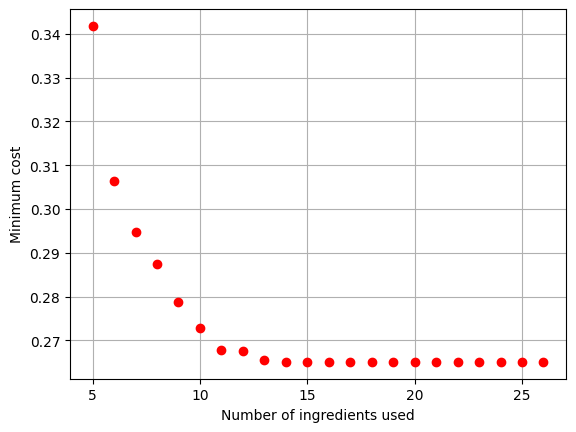

In [21]:
#Plot obtained values
import matplotlib.pyplot as plt
plt.plot(number_of_ingredients,minimum_cost,'ro')
plt.grid()
plt.xlabel('Number of ingredients used')
plt.ylabel('Minimum cost')
plt.show()